## Data mounting and cleanig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [ ]:
# Take a look at the data
data= pd.read_csv('/content/drive/MyDrive/AE project/insurance.csv')
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
Y = np.array(data['expenses'])
X = data.drop("expenses",axis = 1)
#X['bias'] = 1
X= pd.get_dummies(X, drop_first=True) # convert categorical data to binary data
X = np.array(X)

##Using package from sklearn

In [ ]:
m = len(Y) # Number of training examples
print('Total number of training examples (m) = %s \n' %(m))
#train test split for pre us
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train) 
print(reg.score(X_train,y_train),reg.score(X_test,y_test),reg.coef_,reg.intercept_)
#print(reg.predict(X_test))

Total number of training examples (m) = 1338 

0.7417509671301923 0.7835726930039906 [ 2.56955959e+02  3.37271473e+02  4.25641376e+02 -1.85197407e+01
  2.36503123e+04 -3.70313511e+02 -6.58712382e+02 -8.09229878e+02] -11936.77442729219


## Applying linear regression from sratch and linear regression with strategic data sources.

In [ ]:
'''
class LinearRegression:
    
    def __init__(self):
        # Initialize parameters
        self.bias = 0
        
        # Create an attribute to log the loss
        self.loss = []
        
    def fit(self, X, y, alpha = 0.05, n_iterations = 100):
        # Get num observations and num features
        self.n, self.m = X.shape
        
        # Create array of weights, one for each feature
        self.weights = np.ones(self.m)
        
        # Iterate a number of times
        for _ in range(n_iterations):
            
            # Generate prediction
            y_hat = np.dot(X, self.weights) + self.bias
            
            # Calculate error
            error = y - y_hat
            
            # Calculate loss (mse)
            mse = np.square(error).mean()
            
            # Log the loss
            self.loss.append(mse)

            # Calculate gradients using partial derivatives
            gradient_wrt_weights = - (1 / self.n) * np.dot(X.T, error)
            gradient_wrt_bias = - (1 / self.n) * np.sum(error)            
                
            # Update parameters using gradients and alpha    
            self.weights = self.weights - alpha * gradient_wrt_weights
            self.bias = self.bias - alpha * gradient_wrt_bias  
    
    def predict(self, X):
        # Generate predictions using current weights and bias 
        return np.dot(X, self.weights) + self.bias
view raw.py hosted with ❤ by GitHub
'''

'\nclass LinearRegression:\n    \n    def __init__(self):\n        # Initialize parameters\n        self.bias = 0\n        \n        # Create an attribute to log the loss\n        self.loss = []\n        \n    def fit(self, X, y, alpha = 0.05, n_iterations = 100):\n        # Get num observations and num features\n        self.n, self.m = X.shape\n        \n        # Create array of weights, one for each feature\n        self.weights = np.ones(self.m)\n        \n        # Iterate a number of times\n        for _ in range(n_iterations):\n            \n            # Generate prediction\n            y_hat = np.dot(X, self.weights) + self.bias\n            \n            # Calculate error\n            error = y - y_hat\n            \n            # Calculate loss (mse)\n            mse = np.square(error).mean()\n            \n            # Log the loss\n            self.loss.append(mse)\n\n            # Calculate gradients using partial derivatives\n            gradient_wrt_weights = - (1 / s

In [ ]:
##############regular linear regression##############
n, m = X_train.shape
loss = []
alpha = 0.00075
# Create array of weights, one for each feature
weights = np.ones(m)
bias = 0
# Iterate a number of times
for _ in range(100000):
    
    # Generate prediction
    y_hat = np.dot(X_train, weights) + bias
    
    # Calculate error
    error = y_train - y_hat
    
    # Calculate loss (mse)
    mse = np.square(error).mean()
    
    # Log the loss
    loss.append(mse)
    
    # Calculate gradients using partial derivatives
    gradient_wrt_weights =  -(1 / n) * np.dot(X_train.T,error)
    gradient_wrt_bias =  -(1 / n) * np.sum(error)            
        
    # Update parameters using gradients and alpha    
    weights = weights - alpha * gradient_wrt_weights
    bias = bias - alpha * gradient_wrt_bias 

print(weights,bias)
predict = np.dot(X_test, weights)+ bias
#print(predict)
error = y_test - predict
print(loss[-1])

[  250.18003789   302.34398426   398.90791984  -106.77226099
 23566.93568427  -595.48224107  -742.38016532  -985.12203555] -10347.499395529987
37346199.557850435


Text(0.5, 1.0, 'vanilla linear regression')

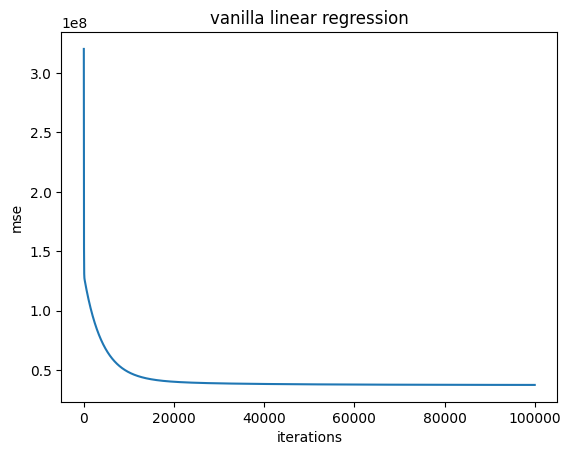

In [ ]:
plt.plot(loss)
plt.xlabel("iterations")
plt.ylabel("mse")
plt.title("vanilla linear regression")

In [ ]:
np.random.randint(0,100,m) + np.random.rand(m)

array([12.0304093 , 95.31771946, 11.3754561 ,  6.96026872, 29.98608923,
       34.46006104, 34.4183151 ,  9.3018007 ])

Text(0.5, 1.0, 'robust linear regression against strategic data')

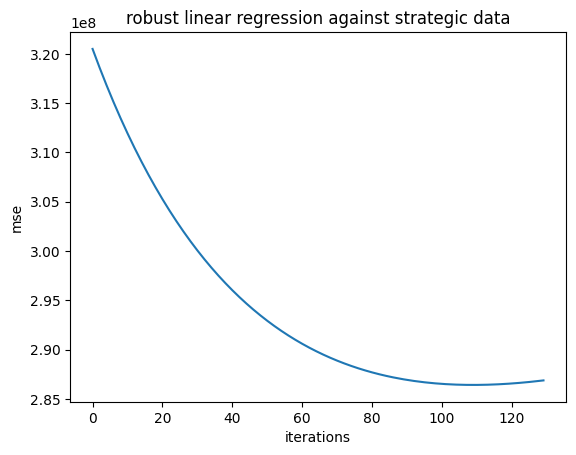

In [ ]:
################linear regression with strategic customers##############
n,m = X_train.shape

weights = np.ones(m)
#weights = np.random.randint(0,100,m) + np.random.rand(m)
bias = 0
alpha = 0.000001
loss = []
for _ in range(130):
    y_hat = np.dot(X_train - weights/2, weights) + bias
    #print(y_hat)
    error = y_train - y_hat
    #print("error: ",error)
    mse = np.square(error).mean()
    loss.append(mse)
    #print(mse)
    error_term_1 = np.dot(X_train,weights) - 1/2 * np.dot(weights,weights) - y_train + bias
    error_term_2 = X_train - weights/2
    gradient_wrt_weights =  (1 /n) * np.dot(error_term_1,error_term_2)
    gradient_wrt_bias =  (1 /n) * np.sum(error_term_1)
    weights = weights - alpha*gradient_wrt_weights 
    #threshold = -(1/2)*np.dot(X_train,X_train.T) + y_train
    #if (bias - alpha*gradient_wrt_bias) > threshold: continue
    bias = bias - alpha*gradient_wrt_bias
plt.plot(loss)
plt.xlabel("iterations")
plt.ylabel("mse")
plt.title("robust linear regression against strategic data")